## Movie Review Classification

![This is getting exciting](https://i.kinja-img.com/gawker-media/image/upload/s--hIgTSFEs--/c_fit,fl_progressive,q_80,w_320/17j2zn73qxdlfgif.jpg)

Using all that we have learned, we will now combine our techniques to perform some basic classifcation! We'll be using the nltk movie reviews data set, we will classify positive and negative reviews. Here's some code to get you started:

In [4]:
from nltk.corpus import movie_reviews as reviews

X = [reviews.raw(fileid) for fileid in reviews.fileids()]
y = [reviews.categories(fileid)[0] for fileid in reviews.fileids()]

1 - Print a positive and negative review:

In [5]:
print('A positive review:')
print(reviews.raw('pos/cv001_18431.txt'))

A positive review:
every now and then a movie comes along from a suspect studio , with every indication that it will be a stinker , and to everybody's surprise ( perhaps even the studio ) the film becomes a critical darling . 
mtv films' _election , a high school comedy starring matthew broderick and reese witherspoon , is a current example . 
did anybody know this film existed a week before it opened ? 
the plot is deceptively simple . 
george washington carver high school is having student elections . 
tracy flick ( reese witherspoon ) is an over-achiever with her hand raised at nearly every question , way , way , high . 
mr . " m " ( matthew broderick ) , sick of the megalomaniac student , encourages paul , a popular-but-slow jock to run . 
and paul's nihilistic sister jumps in the race as well , for personal reasons . 
the dark side of such sleeper success is that , because expectations were so low going in , the fact that this was quality stuff made the reviews even more enthusias

In [6]:
print('A negative review:')
print(reviews.raw('neg/cv000_29416.txt'))

A negative review:
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience 

2 - Using the scikit train_test_split function (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), split the data into a training set and a test set. 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size = 0.33, random_state = 1992)

In [9]:
len(X_train_raw)

1340

In [10]:
len(X_test_raw)

660

3 - Then lemmatize or stem the reviews, and transform the documents to tf-idf.

In [11]:
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

In [12]:
def tokenize(text):
    words = word_tokenize(text)
    words = [PorterStemmer().stem(word) for word in words]
    return words

In [13]:
vectorizer = TfidfVectorizer(tokenizer=tokenize)
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [14]:
X_train.shape

(1340, 27510)

In [15]:
X_test.shape

(660, 27510)

In [16]:
label_encoder = {'pos':1, 'neg':0}
y_train = [label_encoder[label] for label in y_train_raw]
y_test = [label_encoder[label] for label in y_test_raw]
y_test

[1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,


4 - Finally, build a model. To start, use a logistic regression (which we will review in detail in the coming lectures) (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [17]:
#build logistic regression model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)

5 - Measure the efficacy of your model using the Reciever Operator Characteristic (ROC) Area Under the Curve (AUC). Report this metric on the test set of your data.

For more info on this, see: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

In [18]:
#Load packages and calculate auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

In [19]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
logit_roc_auc

0.78533040578405344

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


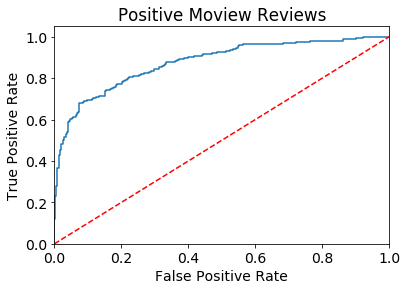

In [20]:
#draw chart to show AUC and ROC

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Positive Moview Reviews')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

6 - Change a parameter in your model (introduce regularization) or change a parameter in your word vector transformation (http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Try introducing the use of stop words, or employing a cutoff on terms with min or max df.

In [21]:
#change parameter in vector transformation
vectorizer = TfidfVectorizer(tokenizer=tokenize,max_df=0.9, min_df=0.1)
X_train_1 = vectorizer.fit_transform(X_train_raw)
X_test_1 = vectorizer.transform(X_test_raw)

In [22]:
#calculate the auc again

logreg.fit(X_train_1, y_train)
y_pred = logreg.predict(X_test_1)
y_pred_proba = logreg.predict_proba(X_test_1)

logit_roc_auc = roc_auc_score(y_test, y_pred)
logit_roc_auc

0.80635915150067528

In [23]:
#use stop words
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
X_train_2 = vectorizer.fit_transform(X_train_raw)
X_test_2 = vectorizer.transform(X_test_raw)

logreg.fit(X_train_2, y_train)
y_pred = logreg.predict(X_test_2)
y_pred_proba = logreg.predict_proba(X_test_2)

logit_roc_auc = roc_auc_score(y_test, y_pred)
logit_roc_auc

0.79726415007671037

7 - Make four models in total, changing parameters and comparing the AUC results. Report your findings in a tabular form.

In [24]:
#make four models in total

def total(y_train, y_test, max_df, min_df):

    vectorizer = TfidfVectorizer(tokenizer=tokenize,
                                     stop_words='english',
                                     max_df=max_df,
                                     min_df=min_df)
    X_train = vectorizer.fit_transform(X_train_raw)
    X_test = vectorizer.transform(X_test_raw)
        
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_pred_proba = logreg.predict_proba(X_test)
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    
    return logit_roc_auc

In [26]:
#call the funtion and print 4-pair-parameters results

AUC_list = []
max_df_list=[0.9, 0.8, 0.7, 0.6]
min_df_list=[0.1, 0.2, 0.3, 0.4]
AUC_list = []

for i in [0,1,2,3]:
    AUC = total(y_train, y_test, max_df_list[i], min_df_list[i])
    AUC_list.append(AUC)
    print (i+1)
    print ("Modle: LogisticRegression")
    print ("TfidfVectorizer-max_df:{}".format(max_df_list[i]))
    print ("TfidfVectorizer-min_df:{}".format(min_df_list[i]))
    print ('AUC score: {}'.format(AUC))
    print ()

1
Modle: LogisticRegression
TfidfVectorizer-max_df:0.9
TfidfVectorizer-min_df:0.1
AUC score: 0.7941681748445122

2
Modle: LogisticRegression
TfidfVectorizer-max_df:0.8
TfidfVectorizer-min_df:0.2
AUC score: 0.7383717191390065

3
Modle: LogisticRegression
TfidfVectorizer-max_df:0.7
TfidfVectorizer-min_df:0.3
AUC score: 0.7126990105740876

4
Modle: LogisticRegression
TfidfVectorizer-max_df:0.6
TfidfVectorizer-min_df:0.4
AUC score: 0.6323919853745028



In [46]:
#print the table form

from prettytable import PrettyTable
t = PrettyTable(['max_df', 'min_df','AUC'])
t.add_row(a)
t.add_row(b)
t.add_row(c)
print (t)

+--------+--------+----------------+
| max_df | min_df |      AUC       |
+--------+--------+----------------+
|  0.9   |  0.1   | 0.794168174845 |
|  0.8   |  0.2   | 0.738371719139 |
|  0.7   |  0.3   | 0.712699010574 |
+--------+--------+----------------+
